<a href="https://colab.research.google.com/github/mvadrev/Robotics/blob/main/Robotics_Lab5%20-%20velocity%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
def sample_normal_distribution(b):
  res = 0
  for i in range(12): 
    res += np.random.uniform(-np.sqrt(b), np.sqrt(b))
  return 0.5 * res 

In [ ]:
def sample_triangular_distribution(b):
  return  np.sqrt(6) * 0.5 * [np.random.uniform(-np.sqrt(b), np.sqrt(b)) + np.random.uniform(-np.sqrt(b), np.sqrt(b))]

In [ ]:
def sample_motion_model_velocity(u, x, dt, alpha, sample):
  v = u[0] + sample(alpha[0] * u[0]**2 + alpha[1] * u[1]**2)
  w = u[1] + sample(alpha[2] * u[0]**2 + alpha[3] * u[1]**2)
  delta = sample(alpha[4] * u[0]**2 + alpha[5] * u[1]**2)
  x_ = x[0] - (v/w) * np.sin(x[2]) + (v/w) * np.sin(x[2] + w * dt)
  y_ = x[1] + (v/w) * np.cos(x[2]) - (v/w) * np.cos(x[2] + w * dt)
  theta_ = x[2] + w * dt + delta * dt
  return np.array([x_, y_, theta_])

In [ ]:
x = np.array([0, 0, 0])
u = np.array([1, 5*np.pi/180])
dt = 20

#  Figure a
alpha_a = np.array([4, 4, 2, 2, 0.1, 0.1]) * 1e-4
x_prime_a = sample_motion_model_velocity(u, x, dt, alpha_a, sample_normal_distribution)
x_prime_a2 = sample_motion_model_velocity(u, x, dt, alpha_a, sample_triangular_distribution)

#  Figure b
alpha_b = np.array([50, 50, 0.1, 0.1, 0.1, 0.1]) * 1e-4
x_prime_b = sample_motion_model_velocity(u, x, dt, alpha_b, sample_normal_distribution)
x_prime_b2 = sample_motion_model_velocity(u, x, dt, alpha_b, sample_triangular_distribution)

#  Figure c
alpha_c = np.array([1, 1, 8, 8, 0.1, 0.1]) * 1e-4
x_prime_c = sample_motion_model_velocity(u, x, dt, alpha_c, sample_normal_distribution)
x_prime_c2 = sample_motion_model_velocity(u, x, dt, alpha_c, sample_triangular_distribution)

In [ ]:
def generate_samples(u , xs ,dt , alpha, sample, nb_samples):
  xs_prime = []
  for i in range(nb_samples):
    i = np.random.randint(len(xs))
    x_prime = sample_motion_model_velocity(u, x[i], dt, alpha, sample_normal_distribution)
    xs_prime.append(x_prime)
  return np.array(xs_prime)

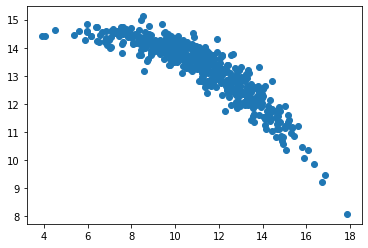

In [ ]:
import matplotlib.pyplot as plt
x = np.array([[0, 0, 0]])
u = np.array([1, 5*np.pi/180])
dt = 20
alpha_a = np.array([4, 4, 2, 2, 0.1, 0.1]) * 1e-4                            
xs_a = generate_samples(u, x, dt, alpha_a, sample_normal_distribution, 500)
plt.scatter(xs_a[: , [0]], xs_a[: , [1]])

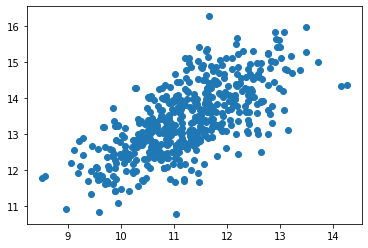

In [ ]:
xs_b = generate_samples(u, x, dt, alpha_b, sample_normal_distribution, 500)
plt.scatter(xs_b[: , [0]], xs_b[: , [1]])

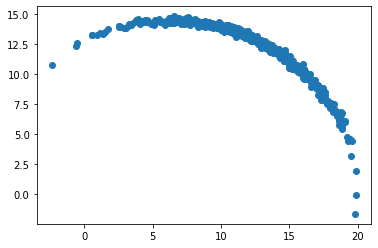

In [ ]:
xs_c = generate_samples(u, x, dt, alpha_c, sample_normal_distribution, 500)
plt.scatter(xs_c[: , [0]], xs_c[: , [1]])